In [30]:
import os
import pandas as pd
import numpy as np
import re
import math

pd.set_option('display.max_columns', 100)

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

import glob
from PIL import Image

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9, 4

In [31]:
def FetAverageResults(label, path, index = -1):
    currentDir = os.getcwd();
    avg_result = None
    try:
        os.chdir(path)
        global_df = []
        for root, dirs, files in os.walk("."):
            if (root.endswith("Results")):
                for file in files:
                    if (file.startswith("Global.txt")):
                        global_df.append(pd.read_csv(root + "/" + file))
        avg_result = pd.concat(global_df, ignore_index=True)
        avg_result = avg_result.groupby('Year').mean()
    except OSError as err:
        print(os.getcwd(),'\n', err)
    else:
        os.chdir(currentDir)
        if (index < 0) | (index == len(avg)) :
            avg.append(avg_result)
            labels.append(label)
            experiments.append(path)
        else:
            avg[index] = avg_result
            labels[index] = label
            experiments[index] = path
        print('Sucess:', label, '\trows:', len(avg_result))
    finally:
        os.chdir(currentDir)


In [32]:
def RemoveConstantCols():
    for i in range(len(avg)):
        df = avg[i]
        cnt = 0;
        names = ''
        for column in df.columns:
            if (df[column][df.index[-1]] == df[column][df.index[1]]):
                names += column + ': ' + str(df[column][df.index[-1]]) + ';'
                cnt += 1
                del df[column]
        if cnt > 0:
            print(labels[i] + " removed cols:", cnt, '\n', names, '\n')

In [65]:
labels = []
experiments = []
avg = []
FetAverageResults('Sociabilit.Test', 'Logs\\010.Sociabilit.Test.resX5.trsim', 0)


Sucess: Sociabilit.Test 	rows: 1120


In [55]:
RemoveConstantCols()

Sociabilit.Test removed cols: 42 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype value (F.r. determintaion efficiency): 0.0; Avg. phenotype value (F.r. punishment li

In [56]:
memoryFeature = ["Memory limit", "MemoryLimit", "ML"]
memoryAvg = ' Avg. phenotype value ({})'.format(memoryFeature[0])
features = [
    ["Trick likelyhood","Trick efficiency", "Teaching likelyhood", "Teaching efficiency", "Study likelyhood", "Study efficiency", "F.r. punishment likelyhood", "F.r. determintaion efficiency", "Going hunting likelyhood", "Hunting efficiency", "Hunting B efficiency", "Cooperation efficiency", "Creativity", "Useless actions likelihood", "Ageing rate", "Creativity", "Sociability"],
    ['TrickLikelyhood','TrickEfficiency','TeachingLikelyhood','TeachingEfficiency','StudyLikelyhood','StudyEfficiency','FreeRiderPunishmentLikelyhood','FreeRiderDeterminationEfficiency','LikelyhoodOfNotBeingAFreeRider','HuntingEfficiency','HuntingBEfficiency','CooperationEfficiency','Creativity','UselessActionsLikelihood','AgeingRate','Creativity','Sociability'],
    ["TrL","TrE","TeL","TeE","SL","SE","FRPL","FRDE","HL","HE","HBE","CE","Cre","Usl","AR","Cre","S"]]
def MemesEfficiency(index):
    return ' {} memes efficiency'.format(features[2][index])
def AvgPhenotype(index):
    return ' Avg. phenotype value ({})'.format(features[0][index])
def AvgMemesSize():
    for i in range(len(avg)):
        df = avg[i]
        for feature in range(len(features[0])):
            memoryPercent = ' % memory: {}'.format(features[1][feature])
            memesEfficiency = MemesEfficiency(feature)
            if ((AvgPhenotype(feature) in df.columns) & (memoryPercent in df.columns) & ~(memesEfficiency in df.columns)):
                df[memesEfficiency] = avg[i][AvgPhenotype(feature)]/(avg[i][memoryAvg]*avg[i][memoryPercent])
                print (memesEfficiency,experiments[i])
        if (' Avg. phenotype value (Memory limit)' in df.columns) & (' % memory: unused' in df.columns) & (' Average memes known' in df.columns):
            df[' Meme size'] = df[' Avg. phenotype value (Memory limit)']*(1-df[' % memory: unused'])/df[' Average memes known']
AvgMemesSize()

 TrE memes efficiency Logs\010.Sociabilit.Test.resX5.trsim
 HE memes efficiency Logs\010.Sociabilit.Test.resX5.trsim
 Usl memes efficiency Logs\010.Sociabilit.Test.resX5.trsim


In [57]:
AvgMemesSize()

In [58]:
pd.DataFrame([avg_df.iloc[avg_df.shape[0]-1] for avg_df in avg])

,Average memes known,Average resources posessed,Avg. genotype value (Memory limit),Avg. genotype value (Sociability),Avg. phenotype value (Hunting efficiency),Avg. phenotype value (Memory limit),Avg. phenotype value (Sociability),Avg. phenotype value (Trick efficiency),Avg. phenotype value (Useless actions likelihood),Population,Tribes in the world.,Live memes,% memory: HuntingEfficiency,% memory: TrickEfficiency,% memory: unused,% memory: UselessActionsLikelihood,Average hunting efforts,Child births,Deaths of old age,Percentage of hunters,Total hunting efforts,Child average brain size,Deaths of hunger,% memory: unused when died,Longevity,TrE memes efficiency,HE memes efficiency,Usl memes efficiency,Meme size
1082000,23.964,16.846,2.509,32.743,230.925,2.509,32.743,1.853,0.00122,2347.0,140.0,175.0,0.397,0.0818,0.52,0.00155,3262.929,85.0,101.0,0.844,456810.1,22.205,6.0,0.346,26.467,9.028622,231.835418,0.313709,0.050255


In [59]:
def ShowGraph(dataframe, column, label):
    if (column in dataframe.columns):
        plt.plot(dataframe[column], label=label)
        plt.legend()
#ShowGraph(avg[0], ' Avg. phenotype value (Memory limit)', '{} Memory limit'.format(labels[i]))
#ShowGraph(avg[0], ' TrE memes efficiency', '{} TrE memes efficiency'.format(labels[i]))
#plt.show()

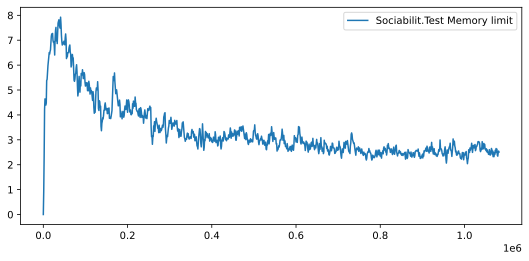

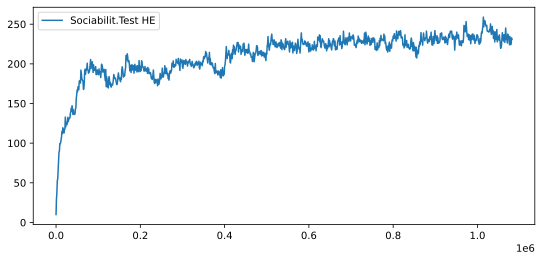

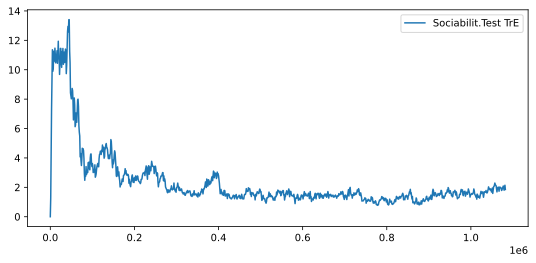

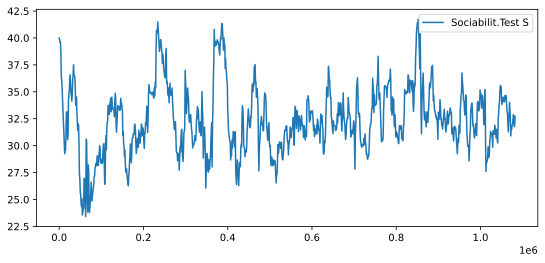

In [61]:
ShowGraph(avg[0], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[0]))
plt.show()

#ShowGraph(avg[0], ' % memory: TrickEfficiency', label='{} % memory TrE'.format(labels[0]))
#ShowGraph(avg[0], ' % memory: HuntingEfficiency', label='{} % memory HE'.format(labels[0]))
#ShowGraph(avg[0], ' % memory: UselessActionsLikelihood', label='{} % memory Usl'.format(labels[0]))
#ShowGraph(avg[0], ' % memory: unused', label='{} % memory unused'.format(labels[0]))
#plt.show()

ShowGraph(avg[0], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[0]))
plt.show()
ShowGraph(avg[0], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[0]))
plt.show()
ShowGraph(avg[0], ' Avg. phenotype value (Sociability)', label='{} S'.format(labels[0]))
plt.show()


#ShowGraph(avg[0], ' TrE memes efficiency', label='{} TrEmemes efficiency'.format(labels[0]))
#plt.show()

#ShowGraph(avg[0], ' HE memes efficiency', label='{} HE memes efficiency'.format(labels[0]))
#plt.show()

#ShowGraph(avg[0], ' Usl memes efficiency', label='{} Usl memes efficiency'.format(labels[0]))
#plt.show()

#Sociability


In [74]:
FetAverageResults('Sociabilit.Genes.1', 'Logs\\010.Sociabilit.Test.free.trsim\\20220130_111712', 1)
FetAverageResults('Sociabilit.Genes.2', 'Logs\\010.Sociabilit.Test.free.trsim\\20220130_135142', 2)
RemoveConstantCols()


Sucess: Sociabilit.Genes1 	rows: 1001
Sucess: Sociabilit.Genes2 	rows: 1001
Sociabilit.Genes1 removed cols: 40 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype value 

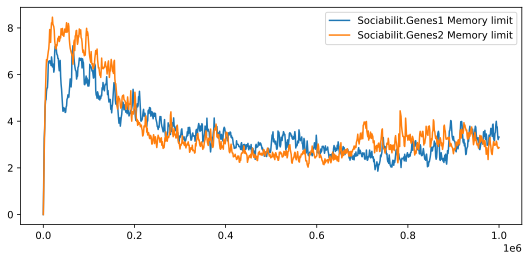

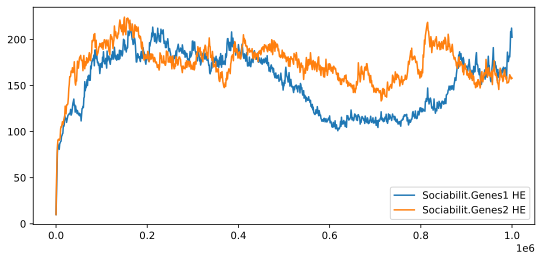

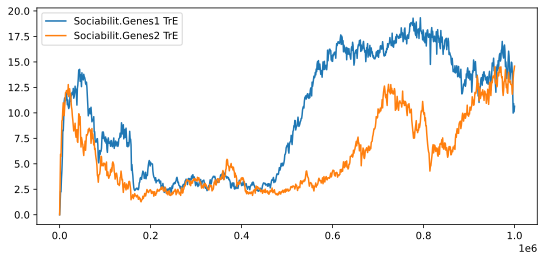

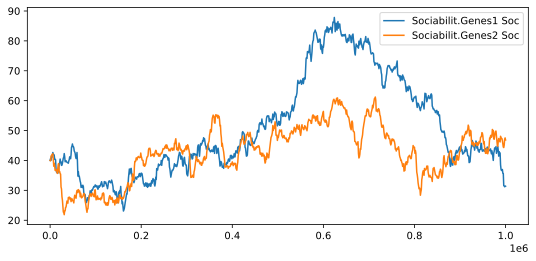

In [89]:
ShowGraph(avg[1], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[2]))
plt.gcf().savefig('Logs\\010.Sociabilit.Test.free.trsim\\figure1.png')
plt.show()
ShowGraph(avg[1], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[2]))
plt.gcf().savefig('Logs\\010.Sociabilit.Test.free.trsim\\figure2.png')
plt.show()
ShowGraph(avg[1], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[2]))
plt.gcf().savefig('Logs\\010.Sociabilit.Test.free.trsim\\figure3.png')
plt.show()
ShowGraph(avg[1], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[1]))
ShowGraph(avg[2], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[2]))
plt.gcf().savefig('Logs\\010.Sociabilit.Test.free.trsim\\figure4.png')
plt.show()

In [90]:
#010.Sociabilit.Test.Memes.trsim
FetAverageResults('Sociabilit.Test', 'Logs\\010.Sociabilit.Test.Memes.trsim', 3)
RemoveConstantCols()
AvgMemesSize()

Sucess: Sociabilit.Test 	rows: 62
Sociabilit.Test removed cols: 42 
  Avg. genotype value (Ageing rate): 0.25; Avg. genotype value (Cooperation efficiency): 1.0; Avg. genotype value (Creativity): 0.0004; Avg. genotype value (F.r. determintaion efficiency): 0.0; Avg. genotype value (F.r. punishment likelyhood): 0.0; Avg. genotype value (Going hunting likelyhood): 1.0; Avg. genotype value (Hunting B efficiency): 0.0; Avg. genotype value (Hunting efficiency): 10.0; Avg. genotype value (Sociability): 30.0; Avg. genotype value (Study efficiency): 1.0; Avg. genotype value (Study likelyhood): 1.0; Avg. genotype value (Teaching efficiency): 0.0; Avg. genotype value (Teaching likelyhood): 1.0; Avg. genotype value (Trick efficiency): 0.0; Avg. genotype value (Trick likelyhood): 1.0; Avg. genotype value (Useless actions likelihood): 0.0; Avg. phenotype value (Ageing rate): 0.25; Avg. phenotype value (Cooperation efficiency): 1.0; Avg. phenotype value (Creativity): 0.0004; Avg. phenotype value (F.

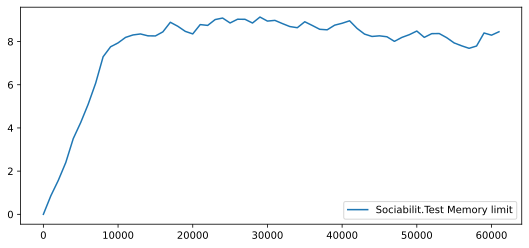

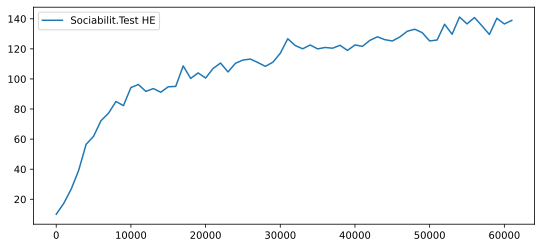

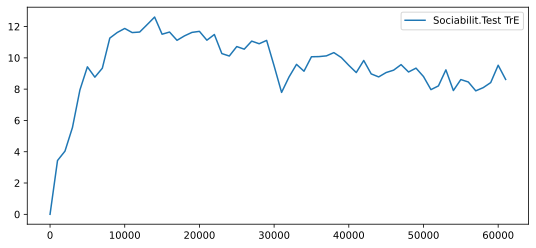

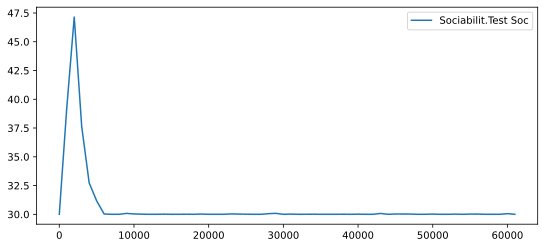

In [91]:
ShowGraph(avg[3], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[3]))
#ShowGraph(avg[2], ' Avg. phenotype value (Memory limit)', label='{} Memory limit'.format(labels[2]))
plt.show()
ShowGraph(avg[3], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[3]))
#ShowGraph(avg[2], ' Avg. phenotype value (Hunting efficiency)', label='{} HE'.format(labels[2]))
plt.show()
ShowGraph(avg[3], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[3]))
#ShowGraph(avg[2], ' Avg. phenotype value (Trick efficiency)', label='{} TrE'.format(labels[2]))
plt.show()
ShowGraph(avg[3], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[3]))
#ShowGraph(avg[2], ' Avg. phenotype value (Sociability)', label='{} Soc'.format(labels[2]))
plt.show()

In [105]:
avg[1].head()
avg[1][avg[1].index == 600000]

,Average memes known,Average resources posessed,Avg. genotype value (Memory limit),Avg. genotype value (Sociability),Avg. phenotype value (Hunting efficiency),Avg. phenotype value (Memory limit),Avg. phenotype value (Sociability),Avg. phenotype value (Trick efficiency),Avg. phenotype value (Useless actions likelihood),Population,Tribes in the world.,Live memes,% memory: HuntingEfficiency,% memory: TrickEfficiency,% memory: unused,% memory: UselessActionsLikelihood,Average hunting efforts,Child births,Deaths of old age,Meme Invented,Percentage of hunters,Total hunting efforts,% memory: unused when died,Longevity,Deaths of hunger,Child average brain size,TrE memes efficiency,HE memes efficiency,Usl memes efficiency,Meme size
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
600000,24.344,14.573,3.104,77.823,116.999,3.104,77.823,15.057,0.00231,2367.0,64,313.0,0.187,0.3,0.511,0.00189,3599.438,94.0,93.0,2.0,0.83,230364.1,0.28,29.948,4.0,21.143,16.169459,201.566721,0.393757,0.06235
